# Doing the stuff the way it goes in the book

Importing all the stuff

In [1]:
import keras
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Loading the data

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Looking at the data

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

Decoding the data to see actual text

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Preparing the data

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building network

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Preparing network to be used

In [11]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Preparing validation data

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Performing training

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 141us/step - loss: 0.5043 - binary_accuracy: 0.8017 - val_loss: 0.3866 - val_binary_accuracy: 0.8662
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.3050 - binary_accuracy: 0.9010 - val_loss: 0.3078 - val_binary_accuracy: 0.8830
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2225 - binary_accuracy: 0.9301 - val_loss: 0.2937 - val_binary_accuracy: 0.8830
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1764 - binary_accuracy: 0.9436 - val_loss: 0.2723 - val_binary_accuracy: 0.8930
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1428 - binary_accuracy: 0.9554 - val_loss: 0.2812 - val_binary_accuracy: 0.8904
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1197 - binary_accuracy: 0.9602 - val_loss: 0.2931 

Looking at the training performance history

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [0]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

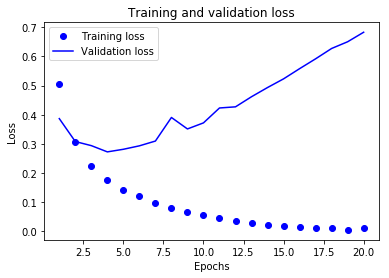

In [16]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

<Figure size 432x288 with 0 Axes>

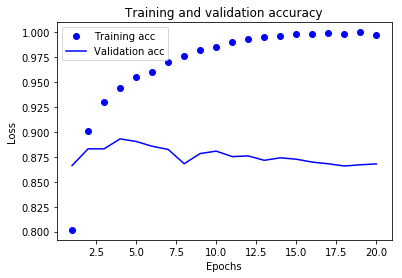

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

New model and it's evaluation

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4594 - acc: 0.8159
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2605 - acc: 0.9112
Epoch 3/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2026 - acc: 0.9277
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step


In [20]:
results

[0.3084859311389923, 0.87776]

Prediction

In [21]:
model.predict(x_test)

array([[0.1885024 ],
       [0.999352  ],
       [0.51582706],
       ...,
       [0.09747311],
       [0.05296031],
       [0.43854174]], dtype=float32)

# And manually using nothing more than NumPy

Importing own classes

In [22]:
# only for google colab
try:
  from google.colab import drive
  drive.mount('/content/drive')
  
  import sys
  sys.path.append('/content/drive/My Drive/Colab Notebooks')
  IN_COLAB = True
except:
  IN_COLAB = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from nnet.layers import Dense, ReLU
from nnet.losses import SoftmaxCrossentropyWithLogitsLoss
from nnet.network import Network
from nnet.metrics import accuracy
from nnet.utils import from_categorical

Using the same data so just building a model

In [0]:
model = Network()
model.append(Dense(10000, 16, xavier=True))
model.append(ReLU())
model.append(Dense(16, 16, xavier=True))
model.append(ReLU())
model.append(Dense(16, 1, xavier=True))

Preparing the model to be used

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the model

In [26]:
y_val

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [27]:
history = model.fit(20, 
                    partial_x_train,
                    partial_y_train,
                    x_val, 
                    y_val)

/content/drive/My Drive/Colab Notebooks/nnet/losses.py:41: RuntimeWarning: invalid value encountered in log
  return -np.sum(target * np.log(predicted)) / predicted.shape[0]


ValueError: ignored

Plotting loss

In [0]:
plt.clf()   # clear figure

# "bo" is for "blue dot"
plt.plot(epochs, history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting accuracy

In [0]:
plt.clf()   # clear figure

# "bo" is for "blue dot"
plt.plot(epochs, history['accuracy'], 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()